In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset Stocks.csv using pandas.

stocks = pd.read_csv("Stocks.csv", skiprows=3)
stocks.head(5)

,Organization,Date,Close,Open,High,Low,Volume
0,APPLE INC. (XNAS:AAPL),2/1/2015,32.12,29.51,33.40,29.02,"1,136,535,493.00"
1,APPLE INC. (XNAS:AAPL),3/1/2015,31.11,32.31,32.57,30.41,"1,138,641,910"
2,APPLE INC. (XNAS:AAPL),4/1/2015,31.29,31.21,33.64,30.78,"996,135,511"
3,APPLE INC. (XNAS:AAPL),5/1/2015,32.57,31.53,33.24,30.84,"954,152,126"
4,APPLE INC. (XNAS:AAPL),6/1/2015,31.36,32.80,32.85,31.12,"878,606,841"


In [3]:
# Split the date column into Year, Month, and Day
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks['Year'] = stocks['Date'].dt.year
stocks['Month'] = stocks['Date'].dt.month
stocks['Day'] = stocks['Date'].dt.day
stocks.head(5)

,Organization,Date,Close,Open,High,Low,Volume,Year,Month,Day
0,APPLE INC. (XNAS:AAPL),2015-02-01,32.12,29.51,33.40,29.02,"1,136,535,493.00",2015,2,1
1,APPLE INC. (XNAS:AAPL),2015-03-01,31.11,32.31,32.57,30.41,"1,138,641,910",2015,3,1
2,APPLE INC. (XNAS:AAPL),2015-04-01,31.29,31.21,33.64,30.78,"996,135,511",2015,4,1
3,APPLE INC. (XNAS:AAPL),2015-05-01,32.57,31.53,33.24,30.84,"954,152,126",2015,5,1
4,APPLE INC. (XNAS:AAPL),2015-06-01,31.36,32.80,32.85,31.12,"878,606,841",2015,6,1


In [4]:
#split the Organization into Company and Ticker.
stocks[['Company', 'Ticker']] = stocks['Organization'].str.split(':', expand=True)
stocks.head(5)

,Organization,Date,Close,Open,High,Low,Volume,Year,Month,Day,Company,Ticker
0,APPLE INC. (XNAS:AAPL),2015-02-01,32.12,29.51,33.40,29.02,"1,136,535,493.00",2015,2,1,APPLE INC. (XNAS,AAPL)
1,APPLE INC. (XNAS:AAPL),2015-03-01,31.11,32.31,32.57,30.41,"1,138,641,910",2015,3,1,APPLE INC. (XNAS,AAPL)
2,APPLE INC. (XNAS:AAPL),2015-04-01,31.29,31.21,33.64,30.78,"996,135,511",2015,4,1,APPLE INC. (XNAS,AAPL)
3,APPLE INC. (XNAS:AAPL),2015-05-01,32.57,31.53,33.24,30.84,"954,152,126",2015,5,1,APPLE INC. (XNAS,AAPL)
4,APPLE INC. (XNAS:AAPL),2015-06-01,31.36,32.80,32.85,31.12,"878,606,841",2015,6,1,APPLE INC. (XNAS,AAPL)


In [5]:
# Remove closing bracket ) from Tickers and split Comapany based on.
stocks['Ticker'] = stocks['Ticker'].str.replace(')', '')
stocks['Company'] = stocks['Company'].str.split('(').str[0]
stocks.head(5)

,Organization,Date,Close,Open,High,Low,Volume,Year,Month,Day,Company,Ticker
0,APPLE INC. (XNAS:AAPL),2015-02-01,32.12,29.51,33.40,29.02,"1,136,535,493.00",2015,2,1,APPLE INC.,AAPL
1,APPLE INC. (XNAS:AAPL),2015-03-01,31.11,32.31,32.57,30.41,"1,138,641,910",2015,3,1,APPLE INC.,AAPL
2,APPLE INC. (XNAS:AAPL),2015-04-01,31.29,31.21,33.64,30.78,"996,135,511",2015,4,1,APPLE INC.,AAPL
3,APPLE INC. (XNAS:AAPL),2015-05-01,32.57,31.53,33.24,30.84,"954,152,126",2015,5,1,APPLE INC.,AAPL
4,APPLE INC. (XNAS:AAPL),2015-06-01,31.36,32.80,32.85,31.12,"878,606,841",2015,6,1,APPLE INC.,AAPL


In [6]:
# Drop Organizationa nd date column
stocks.drop(['Organization', 'Date'], axis=1, inplace=True)
stocks.head(5)

,Close,Open,High,Low,Volume,Year,Month,Day,Company,Ticker
0,32.12,29.51,33.40,29.02,"1,136,535,493.00",2015,2,1,APPLE INC.,AAPL
1,31.11,32.31,32.57,30.41,"1,138,641,910",2015,3,1,APPLE INC.,AAPL
2,31.29,31.21,33.64,30.78,"996,135,511",2015,4,1,APPLE INC.,AAPL
3,32.57,31.53,33.24,30.84,"954,152,126",2015,5,1,APPLE INC.,AAPL
4,31.36,32.80,32.85,31.12,"878,606,841",2015,6,1,APPLE INC.,AAPL


In [7]:
# Dictionary for Company_to_industry mapping.
company_to_industry = {
    "APPLE INC.": "Technology",
    "NVIDIA CORPORATION": "Semiconductors",
    "MICROSOFT CORPORATION": "Technology",
    "AMAZON.COM, INC.": "E-commerce",
    "ALPHABET INC.": "Technology",
    "META PLATFORMS, INC.": "Technology",
    "WALMART INC.": "Retail",
    "VISA INC.": "Finance",
    "BANK OF AMERICA CORPORATION": "Finance",
    "NETFLIX, INC.": "Entertainment",
    "T-MOBILE US, INC.": "Telecommunications",
    "TOYOTA MOTOR CORPORATION": "Automotive",
    "CISCO SYSTEMS, INC.": "Semiconductors",
    "UNITED HEALTH PRODUCTS, INC.": "Healthcare",
    "AT&T INC.": "Telecommunications",
    "BROADCOM INC.": "Semiconductors",
    "COSTCO WHOLESALE CORPORATION": "Retail",
    "THE HOME DEPOT, INC.": "Retail",
    "WELLS FARGO & COMPANY": "Finance",
    "VERIZON COMMUNICATIONS INC.": "Telecommunications",
    "CVS HEALTH CORPORATION": "Healthcare",
    "THE WALT DISNEY COMPANY": "Entertainment",
    "TESLA, INC.": "Automotive",
    "HONDA MOTOR CO., LTD.": "Automotive",
    "WALGREENS BOOTS ALLIANCE, INC.": "Healthcare",
    "QUALCOMM INCORPORATED": "Semiconductors",
    "EBAY INC.": "E-commerce",
    "ETSY, INC.": "E-commerce",
    "SONY GROUP CORPORATION": "Entertainment"
}

stocks['Company'] = stocks['Company'].str.strip().str.upper()  # Removes spaces and ensures uppercase
stocks['Industry'] = stocks['Company'].map(company_to_industry)

# Update the "Industry" column in the DataFrame using the dictionary
stocks['Industry'] = stocks['Company'].map(company_to_industry)
stocks.head(5)

,Close,Open,High,Low,Volume,Year,Month,Day,Company,Ticker,Industry
0,32.12,29.51,33.40,29.02,"1,136,535,493.00",2015,2,1,APPLE INC.,AAPL,Technology
1,31.11,32.31,32.57,30.41,"1,138,641,910",2015,3,1,APPLE INC.,AAPL,Technology
2,31.29,31.21,33.64,30.78,"996,135,511",2015,4,1,APPLE INC.,AAPL,Technology
3,32.57,31.53,33.24,30.84,"954,152,126",2015,5,1,APPLE INC.,AAPL,Technology
4,31.36,32.80,32.85,31.12,"878,606,841",2015,6,1,APPLE INC.,AAPL,Technology


In [8]:
# Print all the unique Company Names
stocks["Company"].unique()

array(['APPLE INC.', 'NVIDIA CORPORATION', 'MICROSOFT CORPORATION',
       'AMAZON.COM, INC.', 'ALPHABET INC.', 'META PLATFORMS, INC.',
       'WALMART INC.', 'VISA INC.', 'BANK OF AMERICA CORPORATION',
       'NETFLIX, INC.', 'T-MOBILE US, INC.', 'TOYOTA MOTOR CORPORATION',
       'CISCO SYSTEMS, INC.', 'UNITED HEALTH PRODUCTS, INC.', 'AT&T INC.',
       'BROADCOM INC.', 'COSTCO WHOLESALE CORPORATION',
       'THE HOME DEPOT, INC.', 'WELLS FARGO & COMPANY',
       'VERIZON COMMUNICATIONS INC.', 'CVS HEALTH CORPORATION',
       'THE WALT DISNEY COMPANY', 'TESLA, INC.', 'HONDA MOTOR CO., LTD.',
       'WALGREENS BOOTS ALLIANCE, INC.', 'QUALCOMM INCORPORATED',
       'EBAY INC.', 'ETSY, INC.', 'SONY GROUP CORPORATION'], dtype=object)

In [9]:
# Convert 'High' and 'Low' columns to numeric, handling potential errors
stocks['High'] = pd.to_numeric(stocks['High'], errors='coerce')
stocks['Low'] = pd.to_numeric(stocks['Low'], errors='coerce')

# Adding Daily_range, Net_change and Percentae_change for better forecasting.
stocks['Daily_range'] = stocks['High'] - stocks['Low']
stocks['Net_change'] = stocks['Close'] - stocks['Open']
stocks['Percentage_change'] = (stocks['Net_change'] / stocks['Open']) * 100


stocks.head(5)

,Close,Open,High,Low,Volume,Year,Month,Day,Company,Ticker,Industry,Daily_range,Net_change,Percentage_change
0,32.12,29.51,33.40,29.02,"1,136,535,493.00",2015,2,1,APPLE INC.,AAPL,Technology,4.38,2.61,8.844460
1,31.11,32.31,32.57,30.41,"1,138,641,910",2015,3,1,APPLE INC.,AAPL,Technology,2.16,-1.20,-3.714020
2,31.29,31.21,33.64,30.78,"996,135,511",2015,4,1,APPLE INC.,AAPL,Technology,2.86,0.08,0.256328
3,32.57,31.53,33.24,30.84,"954,152,126",2015,5,1,APPLE INC.,AAPL,Technology,2.40,1.04,3.298446
4,31.36,32.80,32.85,31.12,"878,606,841",2015,6,1,APPLE INC.,AAPL,Technology,1.73,-1.44,-4.390244


In [10]:
# Check for missing values in the dataset.
stocks.isnull().sum()

,0
Close,0
Open,0
High,1
Low,0
Volume,0
Year,0
Month,0
Day,0
Company,0
Ticker,0


In [11]:
#Fill Missing values of High and Daily_range using Median
stocks['High'].fillna(stocks['High'].median(), inplace=True)
stocks['Daily_range'].fillna(stocks['Daily_range'].median(), inplace=True)
stocks.isnull().sum()

<ipython-input-11-2e1cff494688>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stocks['High'].fillna(stocks['High'].median(), inplace=True)
<ipython-input-11-2e1cff494688>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
Close,0
Open,0
High,0
Low,0
Volume,0
Year,0
Month,0
Day,0
Company,0
Ticker,0


In [12]:
# Set Volume coulumn to int dtype.
stocks['Volume'] = stocks['Volume'].astype(str).str.replace(',', '').astype(float).astype(int)
stocks.head(5)

,Close,Open,High,Low,Volume,Year,Month,Day,Company,Ticker,Industry,Daily_range,Net_change,Percentage_change
0,32.12,29.51,33.40,29.02,1136535493,2015,2,1,APPLE INC.,AAPL,Technology,4.38,2.61,8.844460
1,31.11,32.31,32.57,30.41,1138641910,2015,3,1,APPLE INC.,AAPL,Technology,2.16,-1.20,-3.714020
2,31.29,31.21,33.64,30.78,996135511,2015,4,1,APPLE INC.,AAPL,Technology,2.86,0.08,0.256328
3,32.57,31.53,33.24,30.84,954152126,2015,5,1,APPLE INC.,AAPL,Technology,2.40,1.04,3.298446
4,31.36,32.80,32.85,31.12,878606841,2015,6,1,APPLE INC.,AAPL,Technology,1.73,-1.44,-4.390244


In [13]:
# Get Descriptive Statistics for the data.
stocks.describe()

,Close,Open,High,Low,Volume,Year,Month,Day,Daily_range,Net_change,Percentage_change
count,3487.000000,3487.000000,3487.000000,3487.000000,3.487000e+03,3487.000000,3487.00000,3487.0,3487.000000,3487.000000,3487.000000
mean,99.207482,97.915641,104.761301,91.933542,6.733380e+08,2019.599943,6.49068,1.0,13.074885,1.291841,1.504365
std,120.062050,117.570745,125.679790,111.070008,1.883697e+09,2.894042,3.45529,0.0,19.251870,13.710364,11.519392
min,0.050000,0.070000,0.070000,0.000000,8.981000e+03,2015.000000,1.00000,1.0,0.010000,-186.440000,-49.479830
25%,27.400000,27.290000,29.005000,25.690000,8.126297e+07,2017.000000,3.00000,1.0,2.735000,-1.710000,-4.062382
50%,54.160000,53.850000,56.675000,50.830000,1.939776e+08,2020.000000,6.00000,1.0,5.865000,0.310000,0.985222
75%,129.925000,127.180000,137.210000,119.455000,5.152930e+08,2022.000000,9.00000,1.0,15.130000,3.260000,6.016545
max,979.880000,971.360000,999.000000,912.540000,2.344552e+10,2025.000000,12.00000,1.0,258.530000,133.330000,289.473684


In [14]:
# Drop duplicate rows if any.
stocks.drop_duplicates(inplace=True)

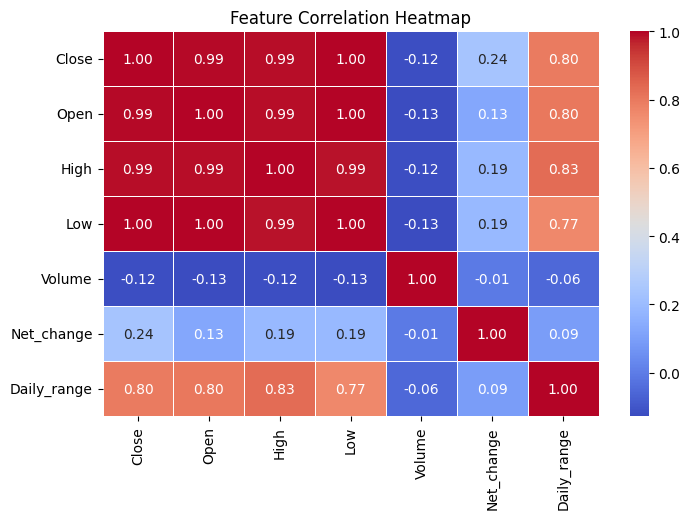

In [15]:
# Compute correlation matrix
corr_matrix = stocks[['Close', 'Open', 'High', 'Low', 'Volume', 'Net_change', 'Daily_range',]].corr()

# Heatmap visualization
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

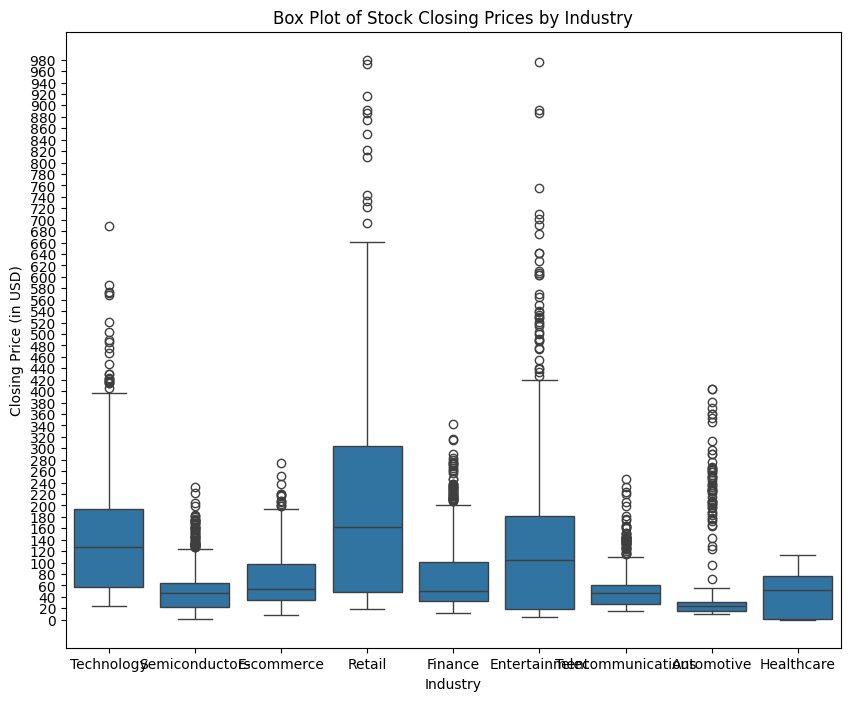

In [16]:
# Create a box plot of 'Close' by 'Industry'
plt.figure(figsize=(10, 8))
sns.boxplot(x='Industry', y='Close', data=stocks)

# Add labels and title
plt.title("Box Plot of Stock Closing Prices by Industry")
plt.xlabel("Industry")
plt.ylabel("Closing Price (in USD)")
plt.yticks(np.arange(0, 1000, 20))
# Show the plot
plt.show()

Outlier Counts: {'Close': 265, 'Daily_range': 343, 'Net_change': 609, 'Percentage_change': 154}
Original Data Size: 3487 rows
Cleaned Data Size: 2484 rows


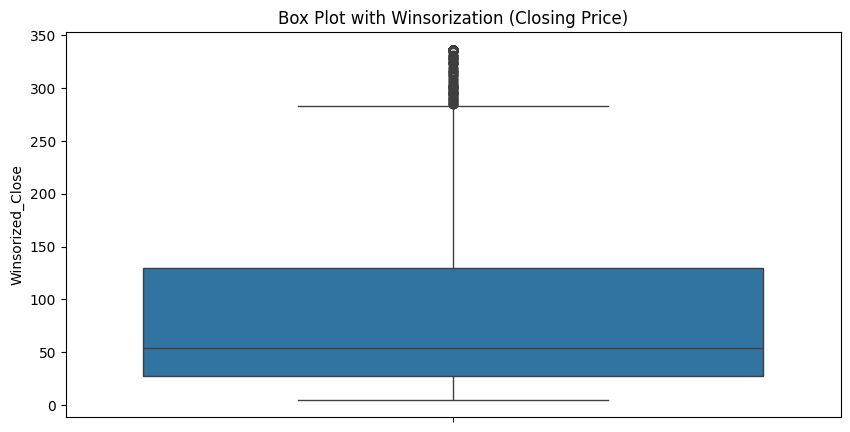

In [17]:
from scipy.stats.mstats import winsorize

# Columns to check for outliers
outlier_columns = ['Close', 'Daily_range', 'Net_change', 'Percentage_change']

# Detect Outliers using IQR
def detect_outliers(stocks, column):
    Q1 = stocks[column].quantile(0.25)
    Q3 = stocks[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = stocks[(stocks[column] < lower_bound) | (stocks[column] > upper_bound)]
    return outliers

# Identify outliers for all key columns
outlier_counts = {col: len(detect_outliers(stocks, col)) for col in outlier_columns}
print(f"Outlier Counts: {outlier_counts}")

# Remove Outliers
def remove_outliers(stocks, column):
    Q1 = stocks[column].quantile(0.25)
    Q3 = stocks[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return stocks[(stocks[column] >= lower_bound) & (stocks[column] <= upper_bound)]

stocks_no_outliers = stocks.copy()
for col in outlier_columns:
    stocks_no_outliers = remove_outliers(stocks_no_outliers, col)

print(f"Original Data Size: {stocks.shape[0]} rows")
print(f"Cleaned Data Size: {stocks_no_outliers.shape[0]} rows")

# Apply Transformations
# Log Transformation (Only for positive values)
stocks['Log_Close'] = np.log1p(stocks['Close'])
stocks['Log_Daily_range'] = np.log1p(stocks['Daily_range'])

# Winsorization (Cap extreme values)
stocks['Winsorized_Close'] = winsorize(stocks['Close'], limits=[0.05, 0.05])
stocks['Winsorized_Daily_range'] = winsorize(stocks['Daily_range'], limits=[0.05, 0.05])

# Create a boxplot tos show the winsorized data
plt.figure(figsize=(10, 5))
sns.boxplot(y=stocks['Winsorized_Close'])
plt.title('Box Plot with Winsorization (Closing Price)')
plt.show()

In [18]:
for col in outlier_columns:
    stocks = remove_outliers(stocks, col)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 0 to 3486
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Close                   2484 non-null   float64
 1   Open                    2484 non-null   float64
 2   High                    2484 non-null   float64
 3   Low                     2484 non-null   float64
 4   Volume                  2484 non-null   int64  
 5   Year                    2484 non-null   int32  
 6   Month                   2484 non-null   int32  
 7   Day                     2484 non-null   int32  
 8   Company                 2484 non-null   object 
 9   Ticker                  2484 non-null   object 
 10  Industry                2484 non-null   object 
 11  Daily_range             2484 non-null   float64
 12  Net_change              2484 non-null   float64
 13  Percentage_change       2484 non-null   float64
 14  Log_Close               2484 non-null   float

In [19]:
# Get Descriptive Statistics after dealing with outliers.
stocks.describe()

,Close,Open,High,Low,Volume,Year,Month,Day,Daily_range,Net_change,Percentage_change,Log_Close,Log_Daily_range,Winsorized_Close,Winsorized_Daily_range
count,2484.000000,2484.000000,2484.000000,2484.000000,2.484000e+03,2484.000000,2484.000000,2484.0,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,54.848760,54.458680,57.309754,51.955769,6.431054e+08,2019.067230,6.497585,1.0,5.353986,0.390081,0.768791,3.626133,1.614502,55.064223,5.377927
std,47.667847,47.311135,49.375271,45.596096,1.846168e+09,2.866599,3.422403,0.0,4.609626,2.795779,5.936230,1.034073,0.694393,47.431894,4.583647
min,0.070000,0.070000,0.070000,0.000000,8.981000e+03,2015.000000,1.000000,1.0,0.010000,-7.000000,-15.062288,0.067659,0.009950,5.180000,0.630000
25%,23.620000,23.622500,24.932500,22.160000,8.097606e+07,2017.000000,4.000000,1.0,2.187500,-1.112500,-2.993654,3.203559,1.159236,23.620000,2.187500
50%,42.390000,42.225000,44.840000,39.810000,1.929041e+08,2019.000000,6.000000,1.0,4.015000,0.200000,0.781920,3.770229,1.612433,42.390000,4.015000
75%,67.962500,67.705000,70.805000,63.905000,5.083933e+08,2021.000000,9.000000,1.0,7.042500,1.890000,4.553623,4.233563,2.084740,67.962500,7.042500
max,279.080000,284.030000,293.070000,276.160000,2.344552e+10,2025.000000,12.000000,1.0,25.580000,8.090000,16.353887,5.635075,3.280159,279.080000,25.580000


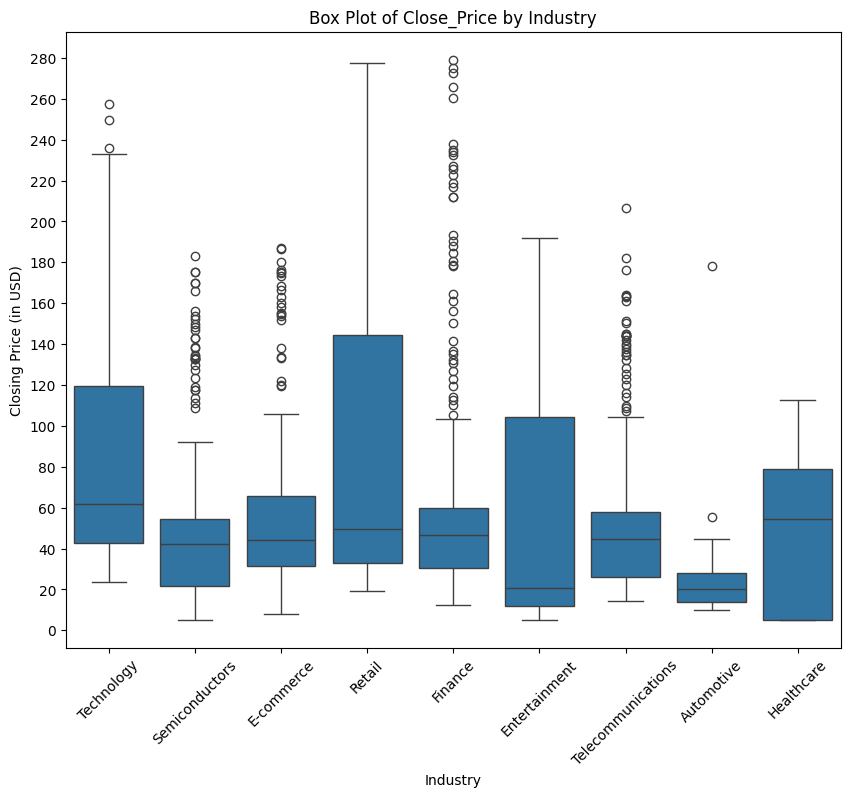

In [20]:
# Create a box plot of 'Close' by 'Industry'
plt.figure(figsize=(10, 8))
sns.boxplot(x='Industry', y='Winsorized_Close', data=stocks)

# Add labels and title
plt.title("Box Plot of Close_Price by Industry")
plt.xlabel("Industry")
plt.ylabel("Closing Price (in USD)")
plt.yticks(np.arange(0, 300, 20))
plt.xticks(rotation=45)
# Show the plot
plt.show()

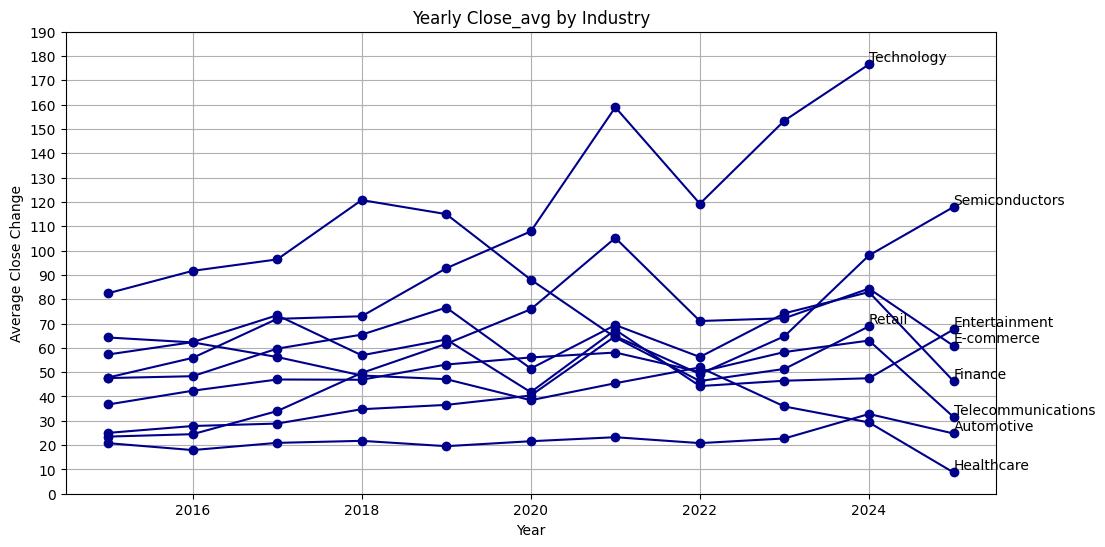

In [21]:
# Calculate yearly average closing price for each industry
industry_Close_avg = stocks.groupby(['Year', 'Industry'])['Winsorized_Close'].mean().reset_index()


plt.figure(figsize=(12, 6))

for industry in industry_Close_avg['Industry'].unique():
    subset = industry_Close_avg[industry_Close_avg['Industry'] == industry]
    # Remove the leading space before 'darkblue' in the color argument
    plt.plot(subset['Year'], subset['Winsorized_Close'], color='darkblue', marker='o')

    # Annotate the last point of each industry
    last_point = subset.iloc[-1]
    plt.text(last_point['Year'], last_point['Winsorized_Close'], industry, fontsize=10, verticalalignment='bottom')

plt.title("Yearly Close_avg by Industry")
plt.xlabel("Year")
plt.ylabel("Average Close Change")

plt.yticks(np.arange(0, 200, 10))
plt.grid()
plt.show()

<ipython-input-22-7615319a5fab>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_volatility, x="Industry", y="Monthly_Volatility", palette="coolwarm")


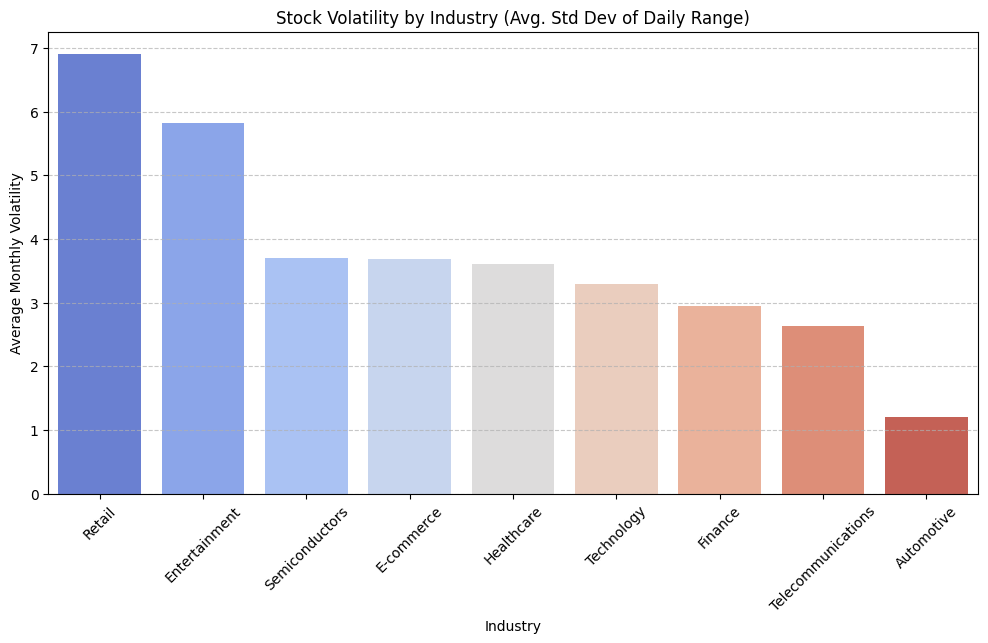

In [22]:
# Compute monthly volatility (standard deviation of Daily_range)
industry_volatility = stocks.groupby(['Industry', 'Year', 'Month'])['Winsorized_Daily_range'].std().reset_index()
industry_volatility.rename(columns={'Winsorized_Daily_range': 'Monthly_Volatility'}, inplace=True)

# Aggregate by industry (average volatility over time)
avg_volatility = industry_volatility.groupby("Industry")["Monthly_Volatility"].mean().reset_index()

# Sort industries by volatility
avg_volatility = avg_volatility.sort_values(by="Monthly_Volatility", ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_volatility, x="Industry", y="Monthly_Volatility", palette="coolwarm")

plt.xlabel("Industry")
plt.ylabel("Average Monthly Volatility")
plt.title("Stock Volatility by Industry (Avg. Std Dev of Daily Range)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-23-32a0ab25b578>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_stocks, x="Ticker", y="Percentage_change", palette="viridis")


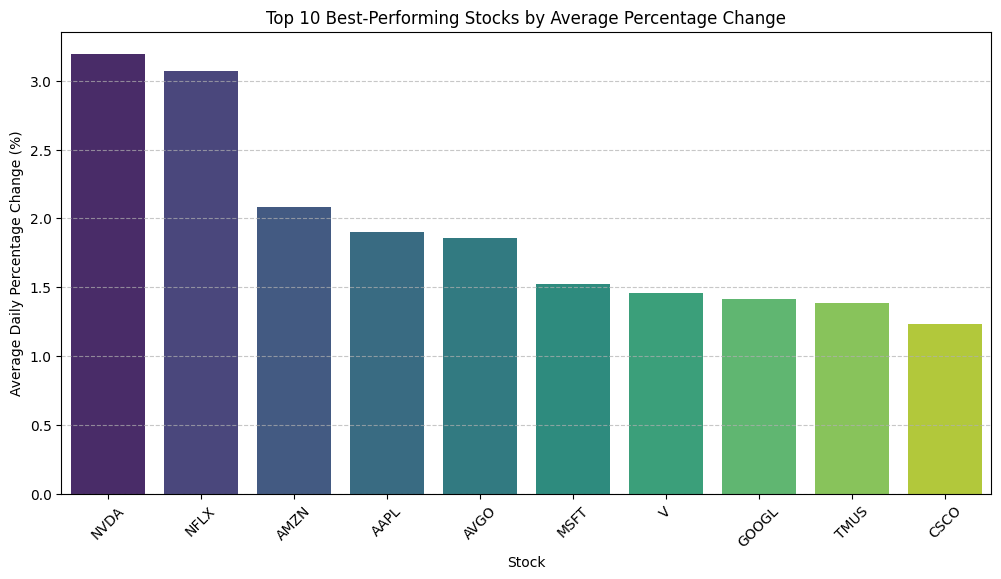

In [23]:
# Compute the average percentage change per stock
# Replace 'Stock' with the actual column name containing stock identifiers (e.g., 'Ticker')
top_stocks = stocks.groupby("Ticker")["Percentage_change"].mean().reset_index()

# Sort in descending order to find top-performing stocks
top_stocks = top_stocks.sort_values(by="Percentage_change", ascending=False)

# Select the top 10 best-performing stocks
top_10_stocks = top_stocks.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
# Replace 'Stock' with the actual column name in the plot as well
sns.barplot(data=top_10_stocks, x="Ticker", y="Percentage_change", palette="viridis")

plt.xlabel("Stock")
plt.ylabel("Average Daily Percentage Change (%)")
plt.title("Top 10 Best-Performing Stocks by Average Percentage Change")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-24-f418cf86be60>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Profit_Industries['Color'] = Profit_Industries['Percentage_change'].apply(lambda x: 'green' if x > 0 else 'red')
<ipython-input-24-f418cf86be60>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Profit_Industries, x="Industry", y="Percentage_change", palette=Profit_Industries['Color'].tolist())


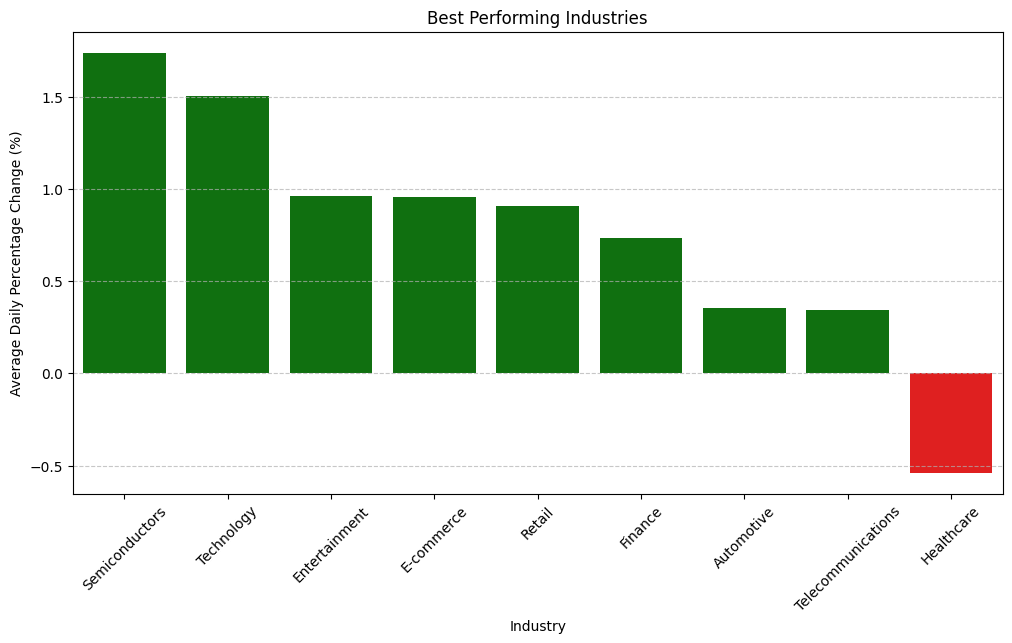

In [24]:
# Compute the average percentage change per industry
top_industries = stocks.groupby("Industry")["Percentage_change"].mean().reset_index()

# Sort in descending order to find top-performing industries
top_industries = top_industries.sort_values(by="Percentage_change", ascending=False)

# Select the top 10 best-performing industries
Profit_Industries = top_industries.head(10)  # Adjusted to select top 10 industries

# Define a custom color function based on the percentage change
Profit_Industries['Color'] = Profit_Industries['Percentage_change'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot bar chart with the custom colors
plt.figure(figsize=(12, 6))
# Convert the 'Color' column to a list to be used as the palette
sns.barplot(data=Profit_Industries, x="Industry", y="Percentage_change", palette=Profit_Industries['Color'].tolist())

# Labels and title adjustments
plt.xlabel("Industry")
plt.ylabel("Average Daily Percentage Change (%)")
plt.title("Best Performing Industries")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

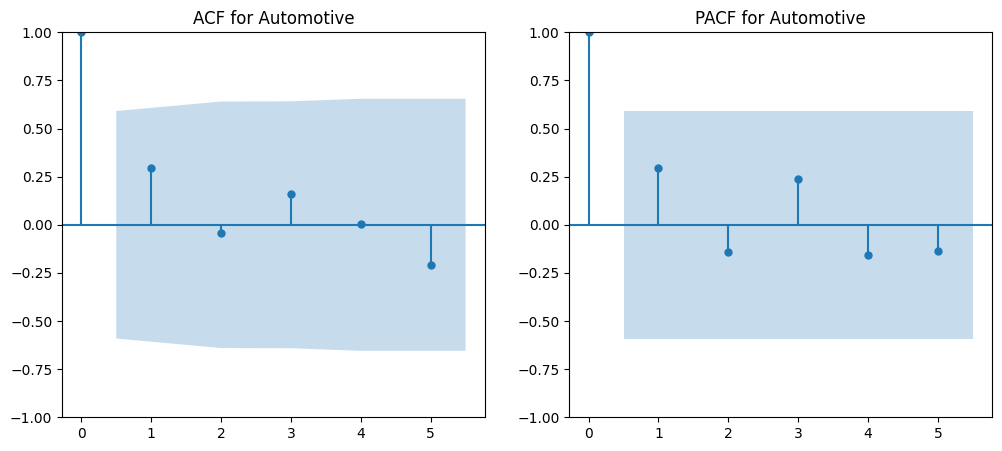

ARIMA Summary for Automotive
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -27.690
Date:                Tue, 04 Mar 2025   AIC                             61.380
Time:                        02:42:58   BIC                             62.287
Sample:                             0   HQIC                            60.384
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1470      3.465     -0.042      0.966      -6.939       6.645
ma.L1         -0.4621      3.353     -0.138      0.890      -7.034       6.110
sigma2        14.3064  

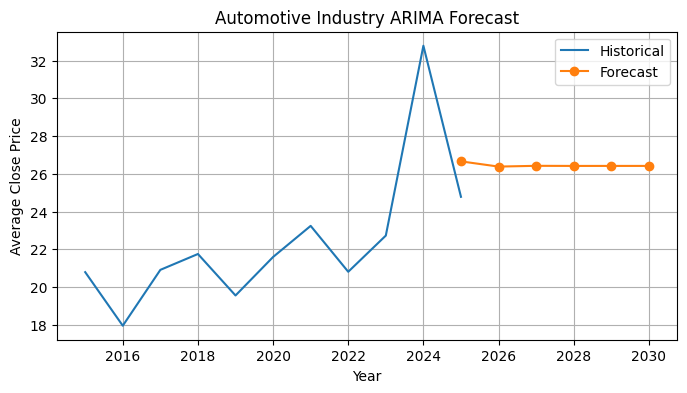

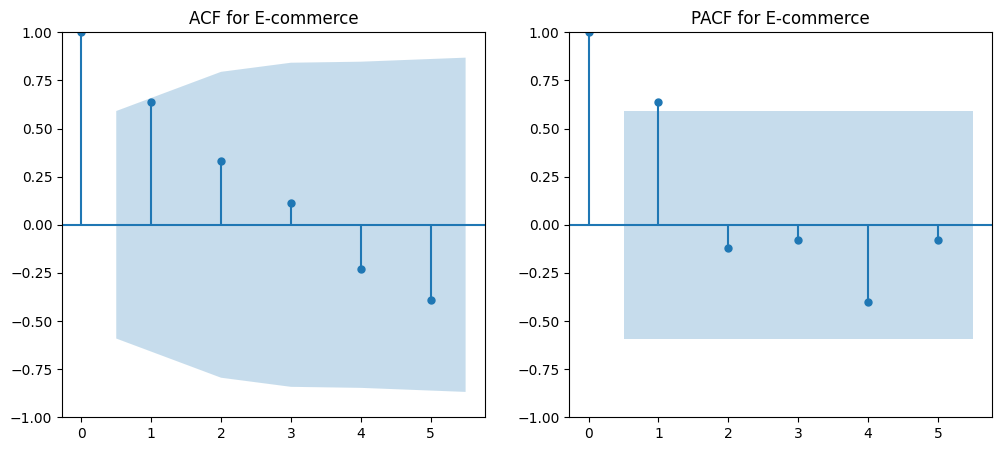

ARIMA Summary for E-commerce
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -43.286
Date:                Tue, 04 Mar 2025   AIC                             92.572
Time:                        02:42:59   BIC                             93.480
Sample:                             0   HQIC                            91.576
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0509      7.135     -0.007      0.994     -14.034      13.933
ma.L1         -0.0707      6.600     -0.011      0.991     -13.007      12.866
sigma2       336.2484  

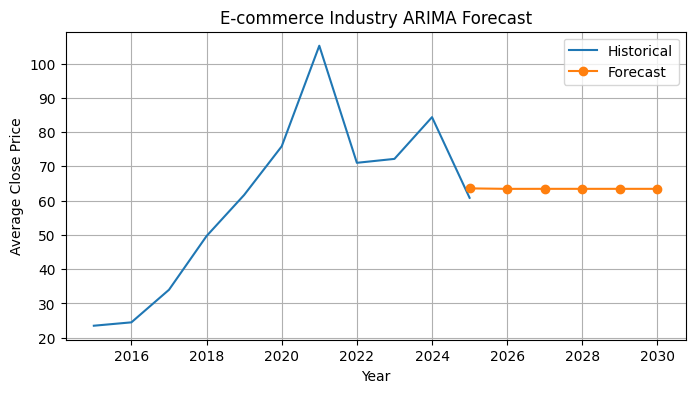

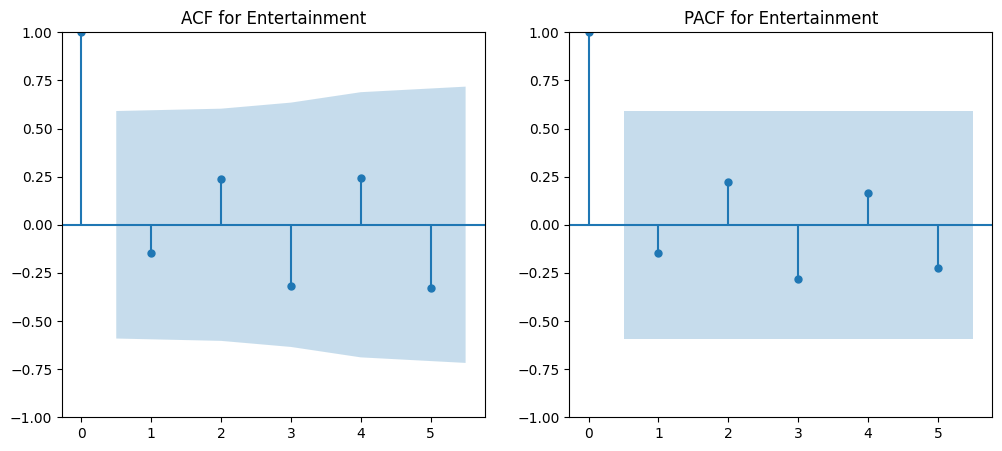

ARIMA Summary for Entertainment
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -38.874
Date:                Tue, 04 Mar 2025   AIC                             83.748
Time:                        02:42:59   BIC                             84.656
Sample:                             0   HQIC                            82.752
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3900      0.522     -0.747      0.455      -1.414       0.634
ma.L1         -0.5593      0.420     -1.332      0.183      -1.382       0.264
sigma2       126.905

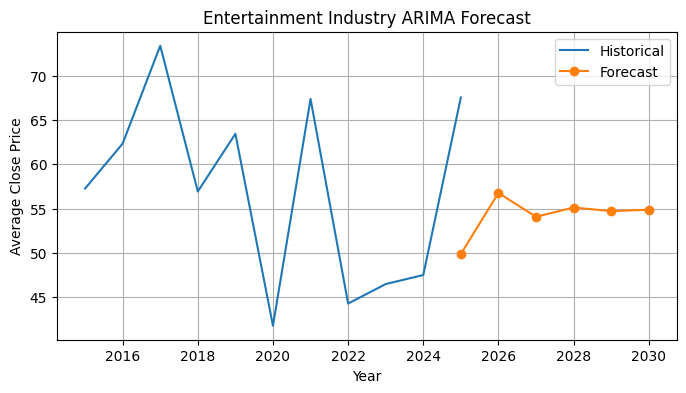

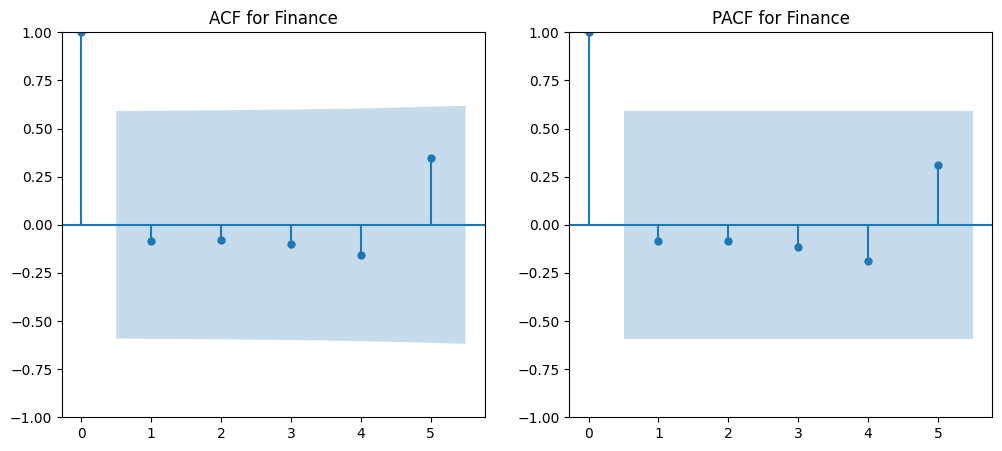

ARIMA Summary for Finance
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -40.901
Date:                Tue, 04 Mar 2025   AIC                             87.802
Time:                        02:43:00   BIC                             88.710
Sample:                             0   HQIC                            86.806
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1087      0.779     -0.140      0.889      -1.635       1.418
ma.L1         -0.7750      0.563     -1.377      0.169      -1.878       0.328
sigma2       187.4473    1

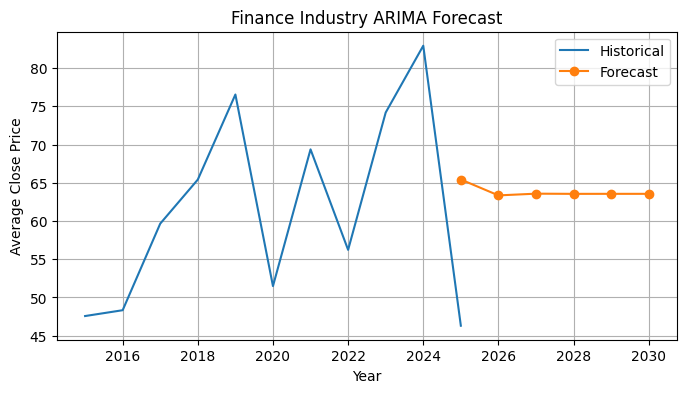

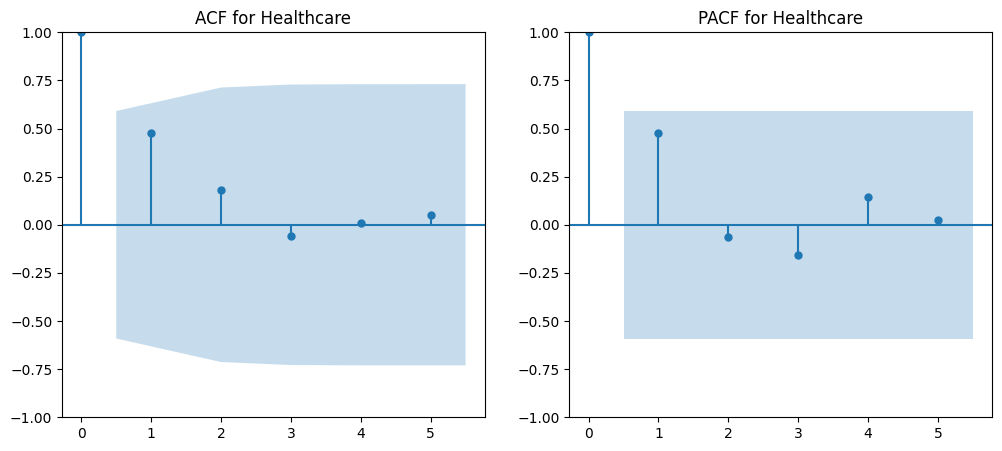

ARIMA Summary for Healthcare
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -36.533
Date:                Tue, 04 Mar 2025   AIC                             79.067
Time:                        02:43:01   BIC                             79.975
Sample:                             0   HQIC                            78.071
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.285      3.513      0.000       0.442       1.558
ma.L1         -0.9956     19.589     -0.051      0.959     -39.389      37.398
sigma2        76.1382  

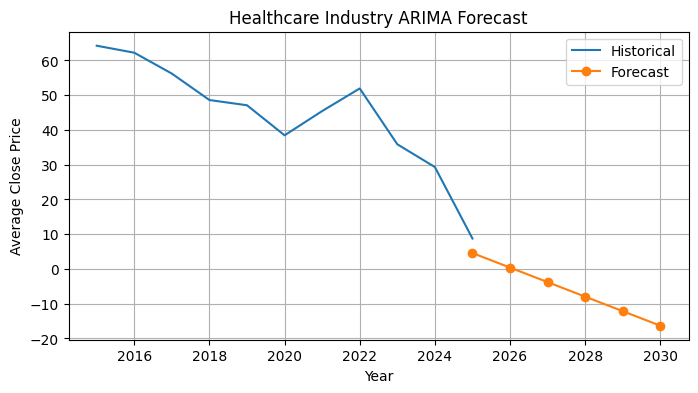

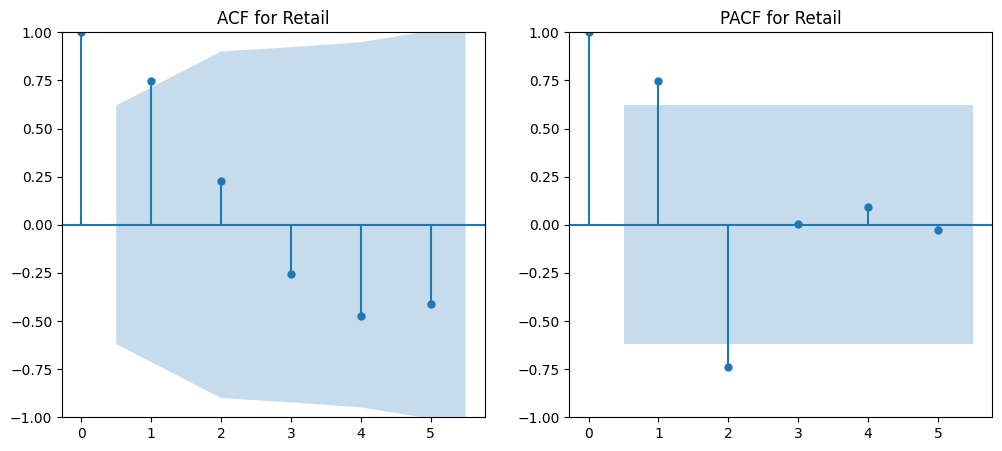

ARIMA Summary for Retail
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -36.672
Date:                Tue, 04 Mar 2025   AIC                             79.343
Time:                        02:43:01   BIC                             79.935
Sample:                             0   HQIC                            78.067
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0147      0.415      0.035      0.972      -0.799       0.828
ma.L1          0.7943      0.623      1.275      0.202      -0.427       2.016
sigma2       181.1624    12

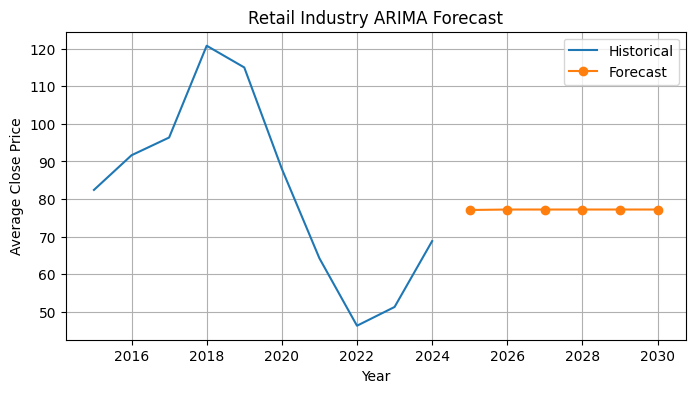

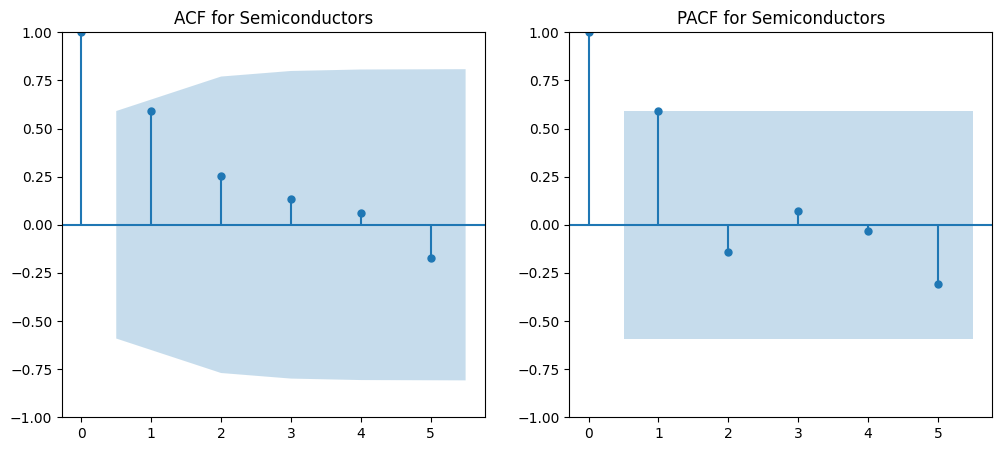

ARIMA Summary for Semiconductors
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -41.269
Date:                Tue, 04 Mar 2025   AIC                             88.538
Time:                        02:43:02   BIC                             89.445
Sample:                             0   HQIC                            87.542
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9393      0.816      1.150      0.250      -0.661       2.540
ma.L1         -0.7592      1.344     -0.565      0.572      -3.393       1.874
sigma2       213.99

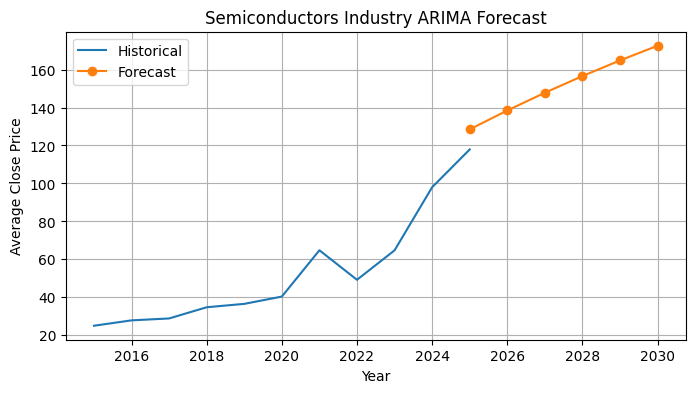

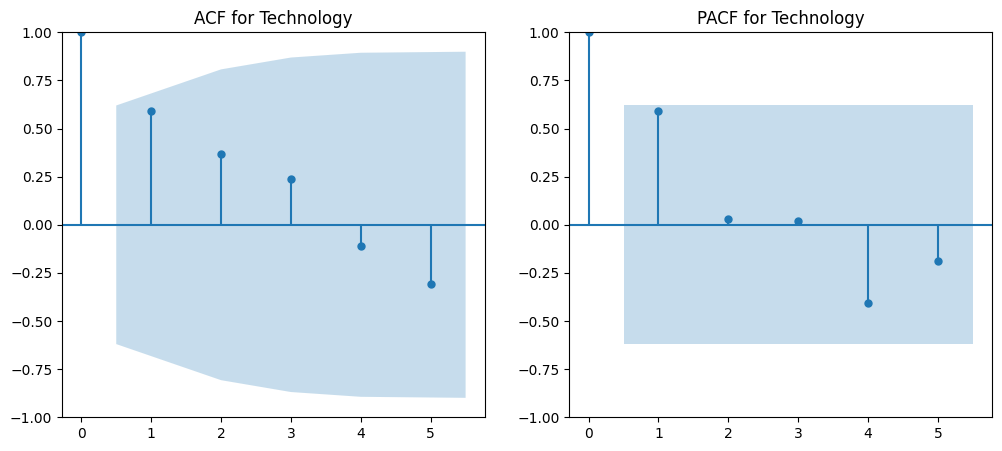

ARIMA Summary for Technology
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -42.265
Date:                Tue, 04 Mar 2025   AIC                             90.530
Time:                        02:43:03   BIC                             91.122
Sample:                             0   HQIC                            89.254
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.015     65.963      0.000       0.970       1.030
ma.L1         -0.9940      0.540     -1.839      0.066      -2.053       0.065
sigma2       626.3636  

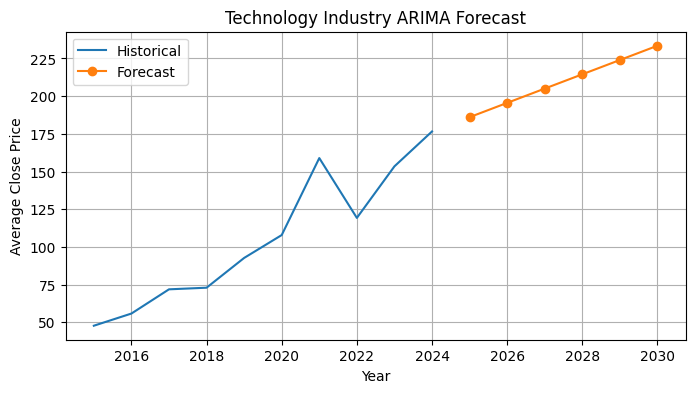

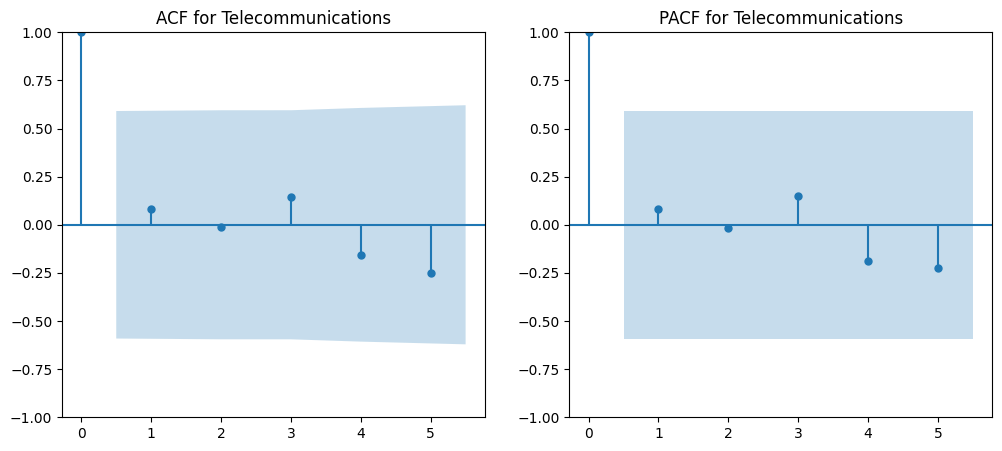

ARIMA Summary for Telecommunications
                               SARIMAX Results                                
Dep. Variable:       Winsorized_Close   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -37.762
Date:                Tue, 04 Mar 2025   AIC                             81.524
Time:                        02:43:04   BIC                             82.432
Sample:                             0   HQIC                            80.528
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5121      2.352     -0.218      0.828      -5.122       4.098
ma.L1          0.9987    178.371      0.006      0.996    -348.602     350.600
sigma2        9

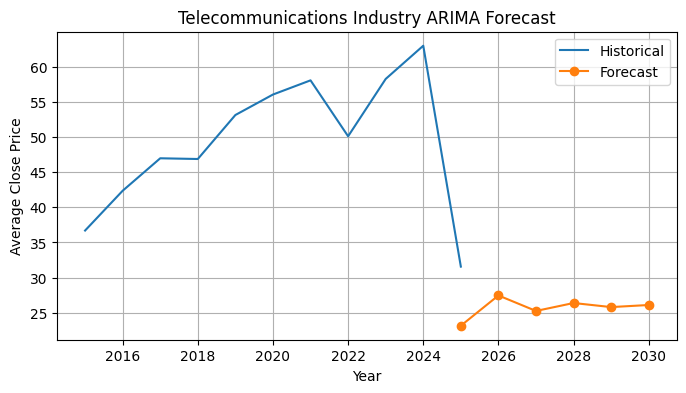


Forecast for Automotive Industry:
 Year  Forecast_Close
 2025       26.658034
 2026       26.381952
 2027       26.422538
 2028       26.416571
 2029       26.417449
 2030       26.417320

Forecast for E-commerce Industry:
 Year  Forecast_Close
 2025       63.569497
 2026       63.428929
 2027       63.436090
 2028       63.435725
 2029       63.435743
 2030       63.435743

Forecast for Entertainment Industry:
 Year  Forecast_Close
 2025       49.862869
 2026       56.758074
 2027       54.068886
 2028       55.117692
 2029       54.708649
 2030       54.868179

Forecast for Finance Industry:
 Year  Forecast_Close
 2025       65.430772
 2026       63.351796
 2027       63.577722
 2028       63.553170
 2029       63.555838
 2030       63.555548

Forecast for Healthcare Industry:
 Year  Forecast_Close
 2025        4.566295
 2026        0.382723
 2027       -3.800714
 2028       -7.984017
 2029      -12.167186
 2030      -16.350221

Forecast for Retail Industry:
 Year  Forecast_Close
 2

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# Load preprocessed industry-level dataset
yearly_avg_industry = stocks.groupby(['Year', 'Industry'])['Winsorized_Close'].mean().reset_index()

# Forecast using ARIMA for each industry
forecast_results = {}

for industry in yearly_avg_industry['Industry'].unique():
    industry_data = yearly_avg_industry[yearly_avg_industry['Industry'] == industry]
    industry_data.set_index('Year', inplace=True)

    # Determine the maximum lag based on data availability
    # Correct the calculation of max_lag to be at most 50% of the data length
    max_lag = min(20, len(industry_data) // 2)  # Use floor division (//) to ensure integer result

    # ACF and PACF plots for parameter selection
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_acf(industry_data['Winsorized_Close'], lags=max_lag, ax=plt.gca()) # Use max_lag here
    plt.title(f'ACF for {industry}')

    plt.subplot(122)
    plot_pacf(industry_data['Winsorized_Close'], lags=max_lag, ax=plt.gca()) # Use max_lag here
    plt.title(f'PACF for {industry}')
    plt.show()

    # Fit ARIMA model (p=1, d=1, q=1) - Adjust based on ACF/PACF plots
    model = ARIMA(industry_data['Winsorized_Close'], order=(1, 1, 1))
    model_fit = model.fit()
    print(f'ARIMA Summary for {industry}')
    print(model_fit.summary())

    # Forecast for 2025 - 2030
    forecast = model_fit.forecast(steps=6)
    forecast_years = [2025, 2026, 2027, 2028, 2029, 2030]
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecast_Close': forecast})

    forecast_results[industry] = forecast_df

    # Plot results
    plt.figure(figsize=(8, 4))
    plt.plot(industry_data.index, industry_data['Winsorized_Close'], label='Historical')
    plt.plot(forecast_years, forecast, label='Forecast', marker='o')
    plt.title(f'{industry} Industry ARIMA Forecast')
    plt.xlabel('Year')
    plt.ylabel('Average Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Display forecast results
for industry, forecast_df in forecast_results.items():
    print(f"\nForecast for {industry} Industry:")
    print(forecast_df.to_string(index=False))

In [36]:
# Export to csv file
stocks.to_csv("stocks_Final.csv", index=True)